In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### Загрузка данных

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

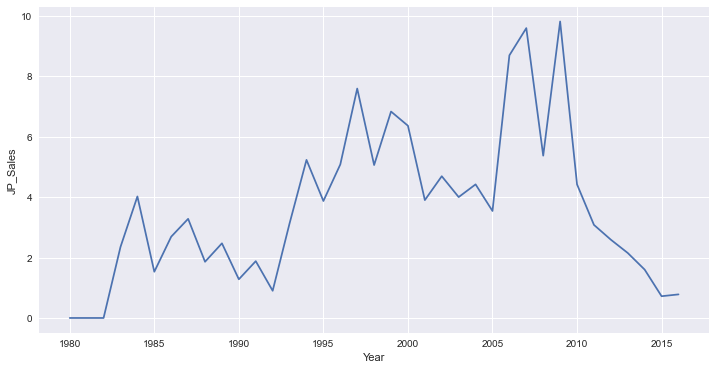

In [3]:
## YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (12,6))
data = df[df['Genre'] == 'Sports'].groupby(['Year'], as_index = False).agg('sum')
sns.lineplot(data=data, x='Year', y='JP_Sales', ax = ax)
plt.show()


### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

Text(0, 0.5, 'Млн. продаж')

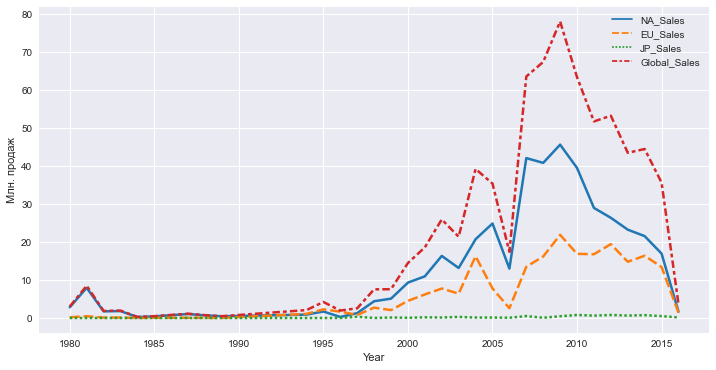

In [4]:
### YOUR CODE HERE ###
fig, ax = plt.subplots(figsize = (12,6))
data = df[df['Publisher'] == "Activision"].groupby(['Year']) \
        .agg('sum')[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']]

sns.lineplot(data=data, palette="tab10", linewidth=2.5, ax=ax)
plt.ylabel('Млн. продаж')

### Комментарий для преподавателя:

В этом задании допустимо вместо прохода циклом использовать `pd.melt()`

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

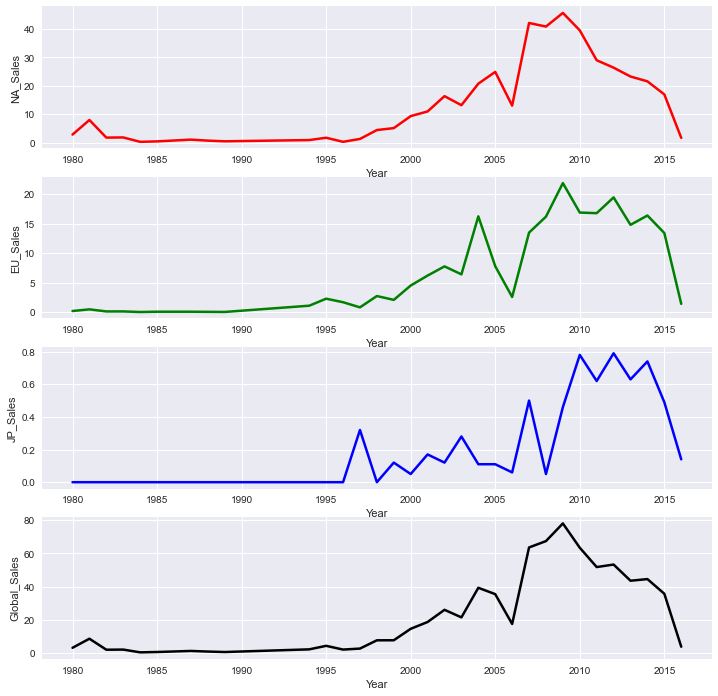

In [5]:
### YOUR CODE HERE ###
fig, ax = plt.subplots(4, 1, figsize = (12,12))
dff = df[df['Publisher'] == "Activision"].groupby(['Year'], as_index = False) \
        .agg('sum')[['Year','NA_Sales','EU_Sales','JP_Sales','Global_Sales']]
sales = iter(list(dff.columns[1:]))
color = iter(['red', 'green', 'blue', 'black'])
for i in range(4):
    sns.lineplot(data=data, x = 'Year', y = next(sales), linewidth=2.5, ax = ax[i], color = next(color))

### Задача 4

Постройте PairPlot для всех численных признаков датасета. Разным цветом укажите цвета для разных платформ.

Примечание: при построении этого графика pandas может выдавать предупреждения (warnings), в этой задаче такое поведение допустимо.

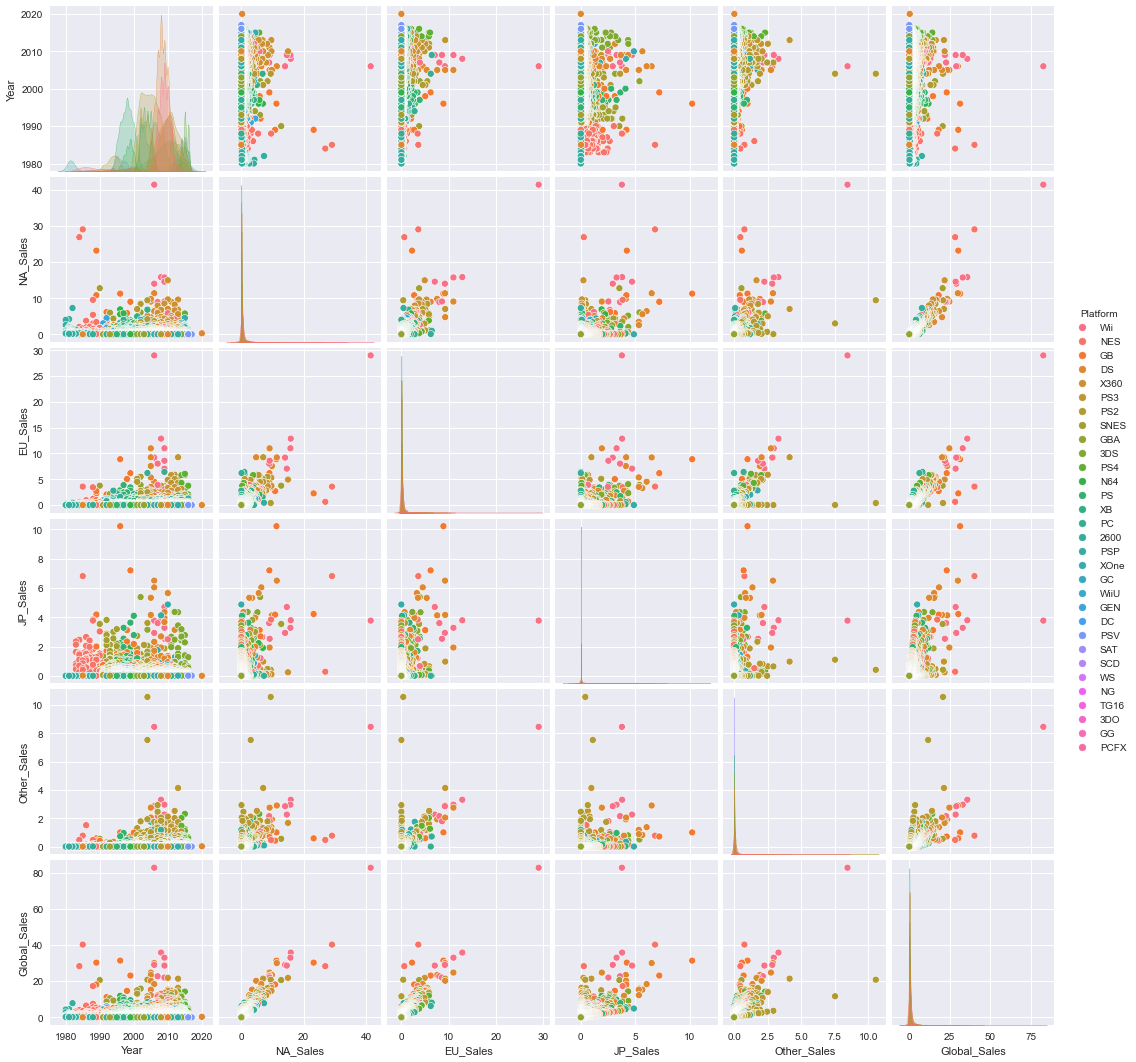

In [6]:
### YOUR CODE HERE ###
sns.pairplot(data = df[df.columns[1:]], hue = 'Platform')
plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков.

D:\python\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


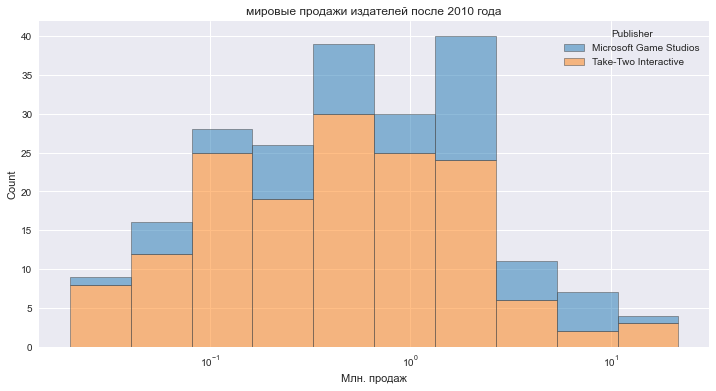

In [7]:
### YOUR CODE HERE ###
data = df[df['Year'].isin(range(2010, 2022))][df['Publisher'].isin(['Microsoft Game Studios', 'Take-Two Interactive'])]
f, ax = plt.subplots(figsize = (12,6))
sns.histplot(
    data,
    x="Global_Sales", hue="Publisher",
    multiple="stack",
    palette="tab10",
    edgecolor=".3",
    bins = 10,
    alpha = 0.5, 
    linewidth=.5,
    log_scale=True,
)
plt.xlabel('Млн. продаж')
ax.set_title('мировые продажи издателей после 2010 года')

plt.show()


### Задача 6

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зелёного полупрозрачного прямоугольника.

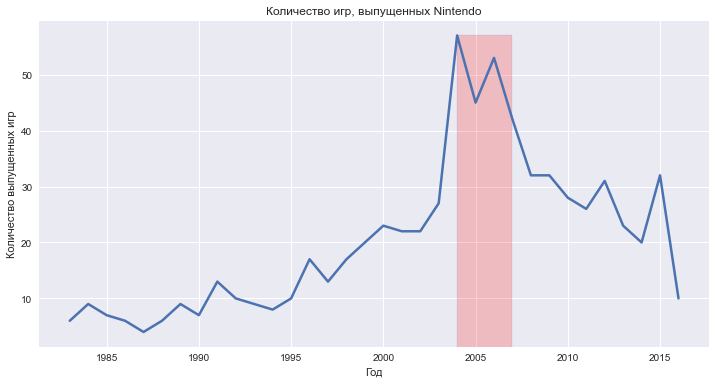

In [8]:
### YOUR CODE HERE ###
import matplotlib.patches as patches

data = df[df['Publisher'] == 'Nintendo'][['Year',"Name"]].groupby('Year', as_index = False).agg('count')
section = (None, None)
section_pretender = (None, None)
for i in range(data.shape[0]):
    if data['Name'].iloc[i] >= 35:
        section_pretender = (i,None)
        while data['Name'].iloc[i] >= 35:
            i += 1
        section_pretender = (section_pretender[0], i - 1)
        if section == (None, None):
            section = section_pretender
        else:
            if len(range(section_pretender[0],section_pretender[1])) > len(range(section[0],section[1])):
                section = section_pretender
f, ax = plt.subplots(figsize = (12,6))
info = *section, len(range(section[0],section[1]))
sns.lineplot(data=data, x = 'Year', y = 'Name', linewidth=2.5, ax=ax)
ax.add_patch(
     patches.Rectangle(
        (data['Year'].iloc[info[0]], 0),
        data['Year'].iloc[info[1]] - data['Year'].iloc[info[0]],
        max([data['Name'][i] for i in info[:2]]),
        alpha = 0.2,
        edgecolor = 'blue',
        facecolor = 'red',
        fill=True
     ))
plt.ylabel("Количество выпущенных игр")
plt.xlabel("Год")
plt.title("Количество игр, выпущенных Nintendo")
plt.show()




### Задача 7

Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов. Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны.

Делайте графики достаточно читаемыми, чтобы из них можно было сделать вывод о наличии / отсутствии зависимостей в данных.

D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
D:\python\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match

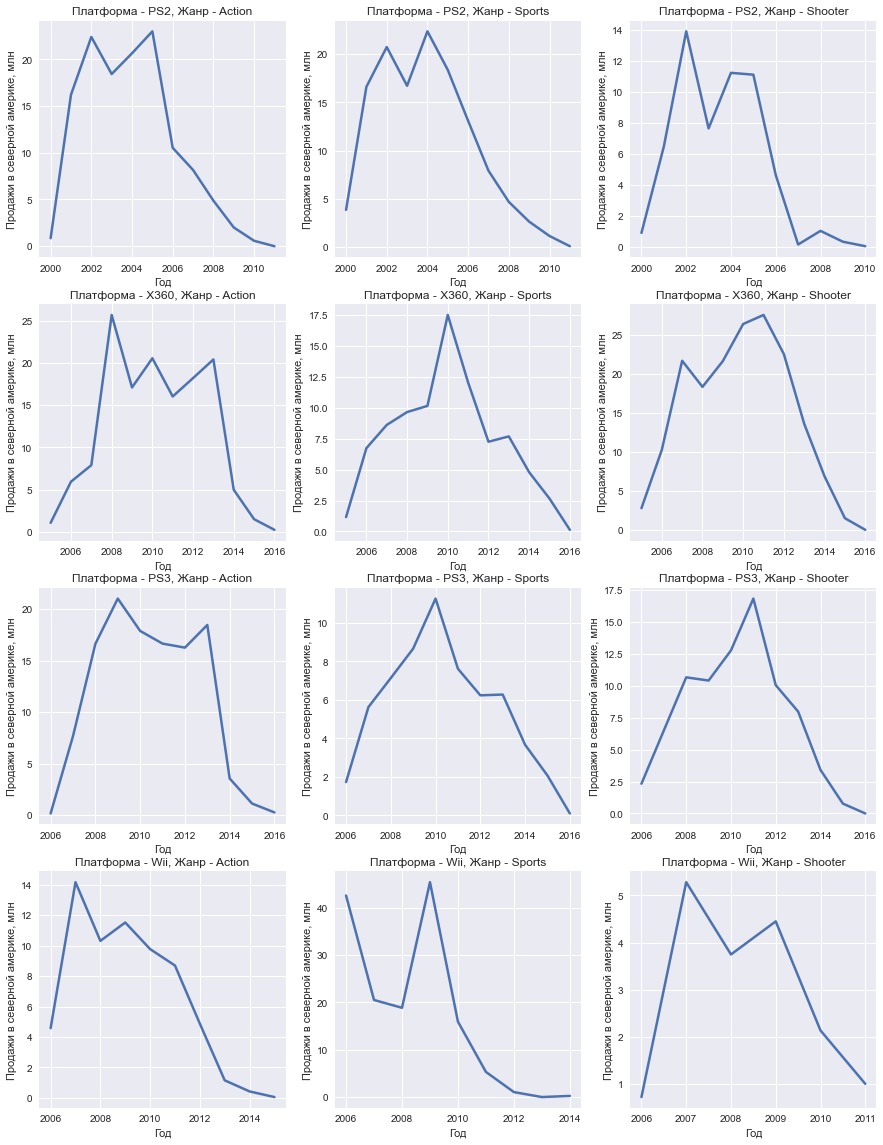

In [69]:
### YOUR CODE HERE ###
data1 = df[['Platform', 'Global_Sales']].groupby('Platform', as_index = False) \
        .agg('sum').sort_values(by='Global_Sales', ascending = False).head(4)
data2 = df[['Genre', 'Global_Sales']].groupby('Genre', as_index = False) \
        .agg('sum').sort_values(by='Global_Sales', ascending = False).head(3)
matrix = [[data1['Platform'].iloc[i] for i in range(data1.shape[0])],
    [data2['Genre'].iloc[i] for i in range(data2.shape[0])]]


fig, ax = plt.subplots(4,3, figsize = (15,20))
for i in range(3):
    for j in range(4):
        sns.lineplot(data = df[df['Platform'] == matrix[0][j]][df['Genre'] == matrix[1][i]] \
                     .groupby('Year', as_index = False).agg('sum'),
            x = 'Year',
            y = 'NA_Sales',
            ax = ax[j,i],
            linewidth=2.5
            )
        ax[j,i].set_title("Платформа - " + str(matrix[0][j]) + ", Жанр - " + str(matrix[1][i]))
        ax[j,i].set_xlabel("Год")
        ax[j,i].set_ylabel("Продажи в северной америке, млн")




                     
